# Неделя 1

## Циклы, функции, генераторы, list comprehension

Итераторы — объекты, которые позволяют обходить коллекции.

In [1]:
# если взять не квадратные а груглые скобки, то будет генератор и он весит меньше
# но генератор можно вызвать один раз

# лист по которому можно итерироваться 
s1 = [i for i in range(100) if i > 50]

# генераторное выражение 
s2 = (i for i in range(100) if i > 50)

# генератор
def it(n):
	for i in range(100):
		if i > 50:
			yield i

In [2]:
for i in [s1, s2, it(100)]:
	print('имя', i)
	print('размер ', i.__sizeof__())
	print('тип', type(i))
	print('-'*20)

имя [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
размер  504
тип <class 'list'>
--------------------
имя <generator object <genexpr> at 0x00000143BAC7E270>
размер  96
тип <class 'generator'>
--------------------
имя <generator object it at 0x00000143BAC7E970>
размер  96
тип <class 'generator'>
--------------------


In [3]:
# Выражение continue дает возможность пропустить часть цикла, где активируется внешнее условие, но при этом выполнить остальную часть цикла. При этом прерывается текущая итерация цикла, но программа возвращается к началу цикла.
x = True
s = 0
while x:
	s += 1
	if s % 2 == 0:
		continue
		print('нет печаты')
	print(s)
	if s > 10:
		break

1
3
5
7
9
11


## Чтение данных из файлов

In [4]:
with open('пример.txt', 'r', encoding="utf-8") as fp:
    for line in fp:
        print(line.rstrip('\n'))

Функция open() открывает файл для чтения или записи при помощи файлового потока. Если файл не может быть открыт, бросается исключение OSError.

Функция возвращает файловый объект, который имеет методы, позволяющие читать и записывать информацию различными способами.

Аргумент file - это строка, определяющая абсолютное или относительное расположение открываемого файла в 
файловой системе или целочисленный файловый дескриптор файла. Если задан файловый дескриптор, он закрывается, когда
 возвращаемый файловый поток закрывается, если для closefd не установлено значение False.


In [5]:
# файл нужно закрыть 
fp.close()

In [6]:
# если нужно работать с кодировками
import codecs
codecs.open('пример.txt', 'r', encoding= 'utf-8')

In [7]:
# В Python функция map принимает два аргумента: функцию и аргумент составного типа данных, например, список. map применяет к каждому элементу списка переданную функцию.
list(map(lambda x: x ** 2 , [1, 2]))

[1, 4]

In [8]:
# Функция filter предлагает элегантный вариант фильтрации элементов последовательности
mixed = ['мак', 'просо', 'мак', 'мак', 'просо', 'мак', 'просо', 'просо', 'просо', 'мак']
zolushka = list(filter(lambda x: x != 'мак', mixed))
 
print (zolushka)

['просо', 'просо', 'просо', 'просо', 'просо']


In [9]:
# Функция reduce принимает 2 аргумента: функцию и последовательность. reduce() последовательно применяет функцию-аргумент к элементам списка, возвращает единичное значение. 
from functools import reduce
items = [1,2,3,4,5]
# x – текущий пункт, а – аккумулятор
sum_all = reduce(lambda x,a: x + a, items)
 
print (sum_all)

15


- Функция - это отображение из области определеения в область значений
	- Непрерывность - возможность нарисовать функцию одним росчерком 
	- Гладкость 
		- отсутсвие углов (функция виерштрассе везде негладкая )
		- это свойсво функций с непрерывной производной
- Производная - мгновенная скорость роста функции, определенная с помощью предела,
- Выпуклость (вверх/вниз): выпуклая / вогнутая 
  - наклон касательной растет - выпукла ( парабола с ветвями вверх, например)
  - наклон касательной падает - вогнута ( парабола с ветвями ввниз, например)

Условие экстремума:
	- необходимое: вторая производная не равна  0
	- достаточное: первая производная = 0 

# Неделя 2

## Библиотеки

In [10]:
import pandas as pd

In [11]:
#создание DataFrame по столбцам с помощью словарей
frame = pd.DataFrame({'numbers':range(10), 'chars':['a']*10})
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numbers  10 non-null     int64 
 1   chars    10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [12]:
# удалить строки 8-9 
frame.drop([8, 9], axis = 0)

,numbers,chars
0,0,a
1,1,a
2,2,a
3,3,a
4,4,a
5,5,a
6,6,a
7,7,a


In [13]:
import numpy as np

In [14]:
x = [2, 3, 4, 6]
y = np.array(x)

In [15]:
# x > 3 вернет булевый массив, в котором для элементов x, которые больше 3, будет стоять True. Потом x[x > 3] выберет сами элементы.

In [16]:
# взять срез в numpy можно и при помощи просто указаний индексов   в квадратных скобках 
print(y[[0, 2]])
# взять срез в pandas индексы только так
print(x[1:3])

[2 4]
[3, 4]


In [17]:
# инициализация матрицы
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)
nd_array

array([[1, 2, 4],
       [3, 1, 0]])

In [18]:
# взять элементы матрицы
matrix[0][0]

1

<AxesSubplot:>

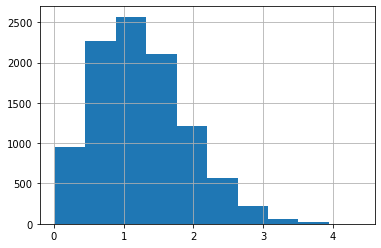

In [19]:
# пример построения  распределения релея и вообще любое
pd.Series((np.random.rayleigh() for i in range(10000))).hist()

In [20]:
np.random.randn(2, 5)

array([[-0.84704331,  0.66680758,  2.01802872,  1.49756905, -1.78475941],
       [ 1.6875165 , -2.06286101,  0.83391429,  2.14918064, -1.16897421]])

In [21]:
# быстрее чем просто range
# можно использовать дробный шаг
np.arange(5, 6, 0.01)

array([5.  , 5.01, 5.02, 5.03, 5.04, 5.05, 5.06, 5.07, 5.08, 5.09, 5.1 ,
       5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21,
       5.22, 5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.3 , 5.31, 5.32,
       5.33, 5.34, 5.35, 5.36, 5.37, 5.38, 5.39, 5.4 , 5.41, 5.42, 5.43,
       5.44, 5.45, 5.46, 5.47, 5.48, 5.49, 5.5 , 5.51, 5.52, 5.53, 5.54,
       5.55, 5.56, 5.57, 5.58, 5.59, 5.6 , 5.61, 5.62, 5.63, 5.64, 5.65,
       5.66, 5.67, 5.68, 5.69, 5.7 , 5.71, 5.72, 5.73, 5.74, 5.75, 5.76,
       5.77, 5.78, 5.79, 5.8 , 5.81, 5.82, 5.83, 5.84, 5.85, 5.86, 5.87,
       5.88, 5.89, 5.9 , 5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98,
       5.99])

In [22]:
from scipy import optimize

In [23]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

f([3.2, 0.1])

3.0

In [24]:
# найти минимум 
x_min = optimize.minimize(f, [5, 5])
x_min.x

array([3.19999896, 0.10000026])

In [25]:
from scipy import linalg
a = np.array([  [3, 2, 0],
				[1, -1, 0],
				[0, 5, 1]
			])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [26]:
# перемножим вектора 
np.dot(a, x)

array([ 2.,  4., -1.])

In [27]:
# Сингулярное разложение
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [29]:
x = np.arange(0, 10, 2)
xnew = np.arange(0, 8, 0.1)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

In [30]:
# по этим 
print(x)
# будем инетполировать эти
print(xnew)

[0 2 4 6 8]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [31]:
# можно выполнить задачу интерполяции 
f = interpolate.interp1d(x, y, kind='linear')
ynew = f(xnew)

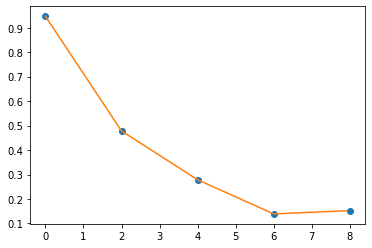

In [32]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Линейная алгебра 

- Зачем делать предсказание - >  чтобь принять меры
- признаковое описание 
	- x = (прибыль за предыдущие 4 мес,  кол-во акций по трем категориям, координаты , сколько дней в следующем магазине)

Векторное пространство — это множество, которое обладает определенными свойствами. Тогда вектором будет называться любой элемент этого пространства. Теперь давайте поговорим о нем подробнее. Итак, векторное пространство — это некоторое множество V, на котором задано две операции — сложение двух векторов и умножение вектора на число. При этом операции должны быть замкнутыми, то есть сумма двух векторов должна давать снова вектор, а умножение любого числа на любой вектор должно давать снова опять же вектор. При этом сложение и умножение должны удовлетворять ряду аксиом, которые соответствуют нашей интуиции о том, как выглядят сложение и умножение.

Ситуация, в которой один вектор выражается как сумма с коэффициентами других векторов, называется линейной зависимостью. Линейная зависимость — это довольно плохо.Приводит к:
  
   - хранению избыточной информации

   - лищним затратам на хранение данных
   
   - вредит методам машинного обучения ( линейным)

**Как определить линейную зависимость**

- метод гауса
- вычислить ранг 
	- *Метод элементарных преобразований. Ранг матрицы равен числу ненулевых строк в матрице после приведения её к ступенчатой форме при помощи элементарных преобразований над строками матрицы.*

**По опредленению**
-  существует взвешенная сумма, в которой хотя бы один вес ненулевой, и которая равна нулю
- один вектор выражается через другие.

**Размерность векторного пространства** - dim - это максимальное число линенйо независимых векторов 

**Базис векторного пространсва** - упорядоченный (конечный или бесконечный) набор векторов в векторном пространстве, такой, что любой вектор этого пространства может быть единственным образом представлен в виде линейной комбинации векторов из этого набора. 

**Норма** - некоторая функция от вектора 

||x|| - обозначение нормы

3 ограничения

 - ||x|| = 0 if x = 0
 - ||x|| * |a| = ||a * x||
 - ||x + y || <=||x ||+ ||y|| - неравенсво треугольника
 
Евклидова норма 
$$||x||_2  = \sqrt{\Sigma x_i^2}$$
Манхэттенская норма 
$$||x||_1  = \sqrt{\Sigma |x_i|}$$

In [33]:
s = [2, 1, 2]
euclidean_norma =  sum(map(lambda x: x**2 , s))**(1/2)
manhattan_norma =  reduce(lambda a, x: np.abs(x) + a, s)

**Метрика, или обобщенное понятие растоняие**
$$\rho = ||x - y||$$


Евклидова метрика 
$$\rho = \sqrt{\Sigma (x_i - y_i)^2}$$
Манхэттенская метрика  
$$\rho   = \sqrt{\Sigma |x_i - y_i|}$$

**Скалярное произведение**

$$\langle x, y \rangle =\sum^{n}_{i=1} x_i*y_i  = ||x || *|| y || * \cos{(\hat{x, y})} $$

норма:

$$||x|| = \sqrt{\langle x, x \rangle}$$

растояние:


$$\rho  = ||x - y || = \sqrt{\langle x-y, x-y \rangle}$$

Векторы паралельны: cos = 1

Векторы перпендикулярны cos = 0 (или по-другому ортогональны)

Длина обобщается на произвольных евклидовых пространствах с помощью нормы. Расстояние же обобщается с помощью метрики, причем метрика легко определяется через норму. Более общая операция — скалярное произведение. Через неё можно ввести и расстояние, и углы. Косинус угла — это очень важная мера сходства векторов

## Собсвенный вектор

Определение: ненулевой вектор , который при умножении на некоторую квадратную матрицу  превращается в самого же себя с числовым коэффициентом , называется **собственным вектором матрицы** . Число  называют собственным значением или собственным числом данной матрицы. 

то есть 
$$
\begin{pmatrix}
  a & c\\
  b & d\\
\end{pmatrix}
*
\begin{pmatrix}
  w_1\\
  w_2\\
\end{pmatrix}
=


\lambda *\begin{pmatrix}
  w_1\\
  w_2\\
\end{pmatrix}
$$ 

## Как определить линеную независимость строк матриц

Некоторые преобразования матрицы не меняют ее ранг. Такие преобразования можно назвать элементарными. Соответствующие факты нетрудно проверить с помощью свойств определителей и определения ранга матрицы.

1. Перестановка столбцов.

2. Умножение элементов какого-нибудь столбца на ненулевой множитель.

3. Прибавление к столбцу любого другого столбца, умноженного на произвольное число.

4. Вычеркивание нулевого столбца.

Аналогичное верно и для строк.

С помощью этих преобразований матрицу можно преобразовать к так называемой "трапециевидной" форме - матрице, под главной диагональю которой располагаются только нули. Для "трапециевидной" матрицы ранг - это число ненулевых элементов на главной

Таким образом, если ранг матрицы совпадает в ее первоначальным количсевом строк, то все строки линейно независимы 

In [34]:
def output_of_indep_(matrix):
	import sympy 
	_, inds = sympy.Matrix(matrix).T.rref()   # to check the rows you need to transpose!
	print('Number of rows which are linear independant (базис)' , inds)

In [35]:
def checking_depend(matrix):
	count_of_rows =matrix.shape[0]

	# Функция linalg.matrix_rank() вычисляет ранг матрицы с помощью ее SVD разложения.
	from numpy import linalg as LA
	rank = LA.matrix_rank(matrix1)

	print('ранк', rank)
	print('Кол-во строк', count_of_rows)

	if count_of_rows == rank:
		print('В матрице нет зависимых строк')
	else:
		print('В матрице есть зависимые строки')

In [36]:
matrix1 = np.array(
				[
					[2, 1 , 11, 2],
					[1,0,4,-1],
					[11,4,56,5],
					[2,-1,5,-6]
				])

In [37]:
output_of_indep_(matrix1)

Number of rows which are linear independant (базис) (0, 1)


In [38]:
checking_depend(matrix1)

ранк 2
Кол-во строк 4
В матрице есть зависимые строки


In [39]:
matrix2 = np.array(
				[
					[4, 1, 4],
					[-2, -1 ,1],
					[3, 1 ,5 ,],
					[-3 ,-2 ,1]
				])

In [40]:
output_of_indep_(matrix2)

Number of rows which are linear independant (базис) (0, 1, 2)


In [41]:
checking_depend(matrix2)

ранк 2
Кол-во строк 4
В матрице есть зависимые строки


## Матрица

In [168]:
# сгенерировать случаную матрицу
m1 =np.arange(12).reshape(3, 4)
m1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [169]:
m2 =np.arange(8).reshape(4, 2)
m2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [189]:
 multiply_matrix2(m1, m2)

[[28, 34], [76, 98], [124, 162]]

In [187]:
# используя транспонирование
def multiply_matrix1(m1, m2):
	if m1.shape[1] == m2.shape[0]:
		s = []
		for i in range(m1.shape[0]):
			a = []
			for j in range(m2.T.shape[0]): 
				a.append(sum(m2.T[j]*m1[i]))
			s.append(a)
		return s

# без используя транспонирование
def multiply_matrix2(m1, m2):
	if m1.shape[1] == m2.shape[0]:
		s = []
		for i in range(m1.shape[0]):
			a = []
			for j in range(m2.shape[1]): 
				row = m1[i]
				col = [m2[i][j] for i in range(m2.shape[0])]
				a.append(sum(row * col))
			s.append(a)
		return s